# Homework 7 

Research and Evaluate the ways to discover ontologies in unstructured data. 
Using one of the tools (RStudio, Python, Jupyter, RapidMiner, or Tabeau), 
perform an ETL on any unstructured dataset you can find online; 
please cite sources. Discuss your process and evaluate your results.

In [1]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
import pandas as pd
from string import punctuation
import re
import seaborn as sns
import warnings


## Read in the English dataset

In [2]:
#Read in the English data from the Excel file
unstructured_eng_df = pd.read_excel("Unstructured Data English.xlsx")

In [3]:
# Display the content of the data frame.
unstructured_eng_df.head(5)
print(" \n Shape ENG: ", unstructured_eng_df.shape)

 
 Shape ENG:  (6936, 3)


## Drop the cloumns that are unneeded for the dataframe from the English dataframe.

In [4]:
# Drop the uneeded columns form the english dataset
unstructured_eng_df = unstructured_eng_df.drop(columns=['ID', 'Unnamed: 2'])
print(" \n Dataframe Eng: \n",unstructured_eng_df.columns)
print(" \n Shape Eng: ", unstructured_eng_df.shape) 
unstructured_eng_df = unstructured_eng_df.rename(columns={"Katakana text Translated" : "Katakana_Text"})

 
 Dataframe Eng: 
 Index(['Katakana text Translated'], dtype='object')
 
 Shape Eng:  (6936, 1)


## Read in the Japanese data from Excel file

In [5]:
unstructured_jp_df = pd.read_excel("Unstructured Data Japanese.xls")
print(" \n Shape JP: ", unstructured_jp_df.shape) 
unstructured_jp_df.columns
print(" \n Shape JP: ", unstructured_jp_df.shape) 

 
 Shape JP:  (541, 2)
 
 Shape JP:  (541, 2)


## Drop the cloumns that are unneeded for the dataframe from the Japanese dataframe.

In [6]:
unstructured_jp_df = unstructured_jp_df.drop(columns=['Sno'])
unstructured_jp_df = unstructured_jp_df.rename(columns={"Kraft Super bowl data" : "Kraft_Text"})

## Check for null values in the data sets

In [7]:
print("Number of null values ENG: ", unstructured_eng_df.isnull().sum())
print("Number of null values JP: ", unstructured_jp_df.isnull().sum())

Number of null values ENG:  Katakana_Text    0
dtype: int64
Number of null values JP:  Kraft_Text    0
dtype: int64


## Print all the contents of the dataframes

In [8]:
#Print all the contents of the dataframes
print("ENG contents: ",unstructured_eng_df)
print("JP contents: ", unstructured_jp_df)

ENG contents:                                            Katakana_Text
0     Huge @Patriots pep rally at Toso's in PHX...wa...
1     For Robert Kraft and Roger Goodell air still i...
2     For Robert Kraft and Roger Goodell air still i...
3     Need #recipes? Visit the Kraft #CookingUpGood ...
4     @EdgeofSports You take the good-You take the b...
...                                                 ...
6931                     CHEESE IN MY POCKETS VELVEETA"
6932  But why somebody just posted a pic on my fb fe...
6933                   Cheese in my pockets .. Velveeta
6934                     Cheese in my pocket Velveeta !
6935  Get a #Save $1 off #Kraft Natural #Cheese Prod...

[6936 rows x 1 columns]
JP contents:                                              Kraft_Text
0    「私は、私は再び8だように行動し、Velveetaマックとディナーにチーズを食べたいです。し...
1    this_Ray私は病気で寝ていると私は眠ることができません。 「赤穂PO SIトラヴィスク...
2    RT JeffSchultzAJC：グッデルは、彼はまた、クラを掃除された理由のAFCタイト...
3    「グッデルは、彼はまた、クラフトのガレージ、プールを掃除された理由のAFCタイトルゲームはま...

## Create the stop words list.

In [9]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves'
             , 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours'
             , 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she'
             , "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself'
             , 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which'
             , 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am'
             , 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has'
             , 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the'
             , 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of'
             , 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into'
             , 'through', 'during', 'before', 'after', 'above', 'below', 'to'
             , 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under'
             , 'again', 'further', 'then', 'once', 'here', 'there', 'when'
             , 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few'
             , 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not'
             , 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't'
             , 'can', 'will', 'just', 'don', "don't", 'should', "should've"
             , 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren'
             , "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn'
             , "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven'
             , "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't"
             , 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't"
             , 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't"
             , 'won', "won't", 'wouldn', "wouldn't"]

## Create the corp list of wrds

In [10]:
corp1 = unstructured_eng_df ['Katakana_Text']
corp1

corp2 = unstructured_jp_df['Kraft_Text']
corp2


0      「私は、私は再び8だように行動し、Velveetaマックとディナーにチーズを食べたいです。し...
1      this_Ray私は病気で寝ていると私は眠ることができません。 「赤穂PO SIトラヴィスク...
2      RT JeffSchultzAJC：グッデルは、彼はまた、クラを掃除された理由のAFCタイト...
3      「グッデルは、彼はまた、クラフトのガレージ、プールを掃除された理由のAFCタイトルゲームはま...
4      RTのc8suchy：「WorldStarComedy：このSMOKE TORNADO CR...
                             ...                        
536                             &アンp; イン エアチンg kラft ヂンン 
537    ジョナtハン Kラft ハs ベエン sテッピンg オウt オf ヒs fアtヘr's シャ...
538    @ビtch_Kラft lオvエ* メ <エd><ウ+00ア0><ウ+00BD><エd><ウ+...
539    RT @メエzytk: fエマlエs wイll lエt ヨウ ヒt ラw ブt sチll ハ...
540    RT @kvb899: #レゲンtsンFLウK Kラft オン sペエch: イ ヂdン't...
Name: Kraft_Text, Length: 541, dtype: object

## Create method to create text list.

In [11]:
def text_to_wordlist(text, remove_stop_words=True, stem_words=False):
     # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"what's", "", text)
    text = re.sub(r"What's", "", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r" m ", " am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"60k", " 60000 ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e-mail", "email", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"quikly", "quickly", text)
    text = re.sub(r" usa ", " America ", text)
    text = re.sub(r" USA ", " America ", text)
    text = re.sub(r" Japanese ", " Japan ", text)
    text = re.sub(r" JAPANESE ", " Japan ", text)
    text = re.sub(r" u s ", " America ", text)
    text = re.sub(r" uk ", " England ", text)
    text = re.sub(r" UK ", " England ", text)
    text = re.sub(r"india", "India", text)
    text = re.sub(r"switzerland", "Switzerland", text)
    text = re.sub(r"china", "China", text)
    text = re.sub(r"chinese", "Chinese", text) 
    text = re.sub(r"imrovement", "improvement", text)
    text = re.sub(r"intially", "initially", text)
    text = re.sub(r"quora", "Quora", text)
    text = re.sub(r" dms ", "direct messages ", text)  
    text = re.sub(r"demonitization", "demonetization", text) 
    text = re.sub(r"actived", "active", text)
    text = re.sub(r"kms", " kilometers ", text)
    text = re.sub(r"KMs", " kilometers ", text)
    text = re.sub(r" cs ", " computer science ", text) 
    text = re.sub(r" upvotes ", " up votes ", text)
    text = re.sub(r" iPhone ", " phone ", text)
    text = re.sub(r"\0rs ", " rs ", text) 
    text = re.sub(r"calender", "calendar", text)
    text = re.sub(r"ios", "operating system", text)
    text = re.sub(r"gps", "GPS", text)
    text = re.sub(r"gst", "GST", text)
    text = re.sub(r"programing", "programming", text)
    text = re.sub(r"bestfriend", "best friend", text)
    text = re.sub(r"dna", "DNA", text)
    text = re.sub(r"III", "3", text) 
    text = re.sub(r"the US", "America", text)
    text = re.sub(r"Astrology", "astrology", text)
    text = re.sub(r"Method", "method", text)
    text = re.sub(r"Find", "find", text) 
    text = re.sub(r"banglore", "Banglore", text)
    text = re.sub(r" J K ", " JK ", text)
    text = re.sub(r"[0-9]"," ", text)
    
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
        
    # Optionally, shorten words to their stems
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)

# Return a list of words
    return(text)

## Method to process the text list

In [12]:
def process_text(text_list, texts, text_list_name, dataframe):
    '''transform questions and display progress'''
    for text in texts:
        text_list.append(text_to_wordlist(text))
        if len(text_list) % 100000 == 0:
            progress = len(text_list)/len(dataframe) * 100
            print("{} is {}% complete.".format(text_list_name, round(progress, 1)))

## Process the list with a method call and pring the result. This will process the English langauge dataframe.

In [13]:
data_text_eng = []
process_text(data_text_eng,  unstructured_eng_df.Katakana_Text, 'data_text_eng',  unstructured_eng_df)
data_text_eng[:10]

#type(data_text)

['Huge Patriots pep rally Toso PHX waiting Mr Kraft arrival GoPats PatriotsExtra http co NElMN jo',
 'For Robert Kraft Roger Goodell air still clear Boston Globe http co Rw oh hswK google sport',
 'For Robert Kraft Roger Goodell air still clear Boston Globe http co yN nBRFne google sport',
 'Need recipes Visit Kraft CookingUpGood page amp watch video delicious ideas http co eEkfmtgln',
 'EdgeofSports You take good You take bad Givin Bob Kraft hand jobs bad The Facts Life The Facts Life tootiebowl',
 'RT HomespunSociety Wrap http co OdXf startup vancouver toronto handmadebot trendit share homespunsoicety',
 'bseymour Cadbury got bought Kraft years back Hence years Creame Eggs terrible',
 'http co UFTZ row enjoy',
 'RT OTLonESPN Tomorrow ET ESPN Fallout Deflategate reaction Friday comments Goodell',
 'Tryna turn kraft cheddar']

## Process the list with a method call and pring the result. This will process the Japanese language dataframe.

In [14]:
data_text_jp = []
process_text(data_text_jp,  unstructured_jp_df.Kraft_Text, 'data_text2',  unstructured_jp_df)
data_text_jp[:10]

#type(data_text)

['Velveeta',
 'Ray PO SI',
 'RT JeffSchultzAJC AFC',
 'AFC',
 'RT c suchy WorldStarComedy SMOKE TORNADO CRAZY AFedU A U BDedU B U AFedU A U BDedU B U edU A U BDedU B U http co vHMnnHUz tayy shee',
 'EDU A U BDedU B U A edU A U BDedU B U A boreoff U B',
 'alledU A U BDedU B U D',
 '',
 '',
 'Mac']

## View the frequency distribution of the words viewing the 20 most common of the English language dataset.

In [15]:
# Frequency of words in the English text
corp1 = data_text_eng
freq_dist_eng = FreqDist(corp1)
print(freq_dist_eng)

<FreqDist with 6664 samples and 6936 outcomes>


## View the frequency distribution of the words viewing the 20 most common of the English language dataset.

In [16]:
freq_dist_eng_com_20 = freq_dist_eng.most_common(15)
print(freq_dist_eng_com_20)

[('Cheese pockets velveeta', 44), ('Cheese pockets Velveeta', 41), ('Cheese pocket velveeta', 38), ('Cheese pocket Velveeta', 29), ('cheese pockets velveeta', 18), ('cheese pocket velveeta', 17), ('Cheese pockets VELVEETA', 11), ('Cheese pocket VELVEETA', 7), ('Cheese In My Pocket Velveeta', 7), ('CHEESE IN MY POCKETS VELVEETA', 6), ('CHEESE IN MY POCKET VELVEETA', 5), ('FREE Kraft Cheese Money Maker Savings Catcher Deal', 5), ('cheese pockets Velveeta', 5), ('Cheese In My Pockets Velveeta', 4), ('Cheese In My Pocket VELVEETA', 4)]


## View as a graph of the frequency distribution of the English words.

Create a dict for ease of graphing and then create a series to facilitate the creation of the graph.

In [17]:
eng_freq = pd.Series(dict(freq_dist_eng_com_20))

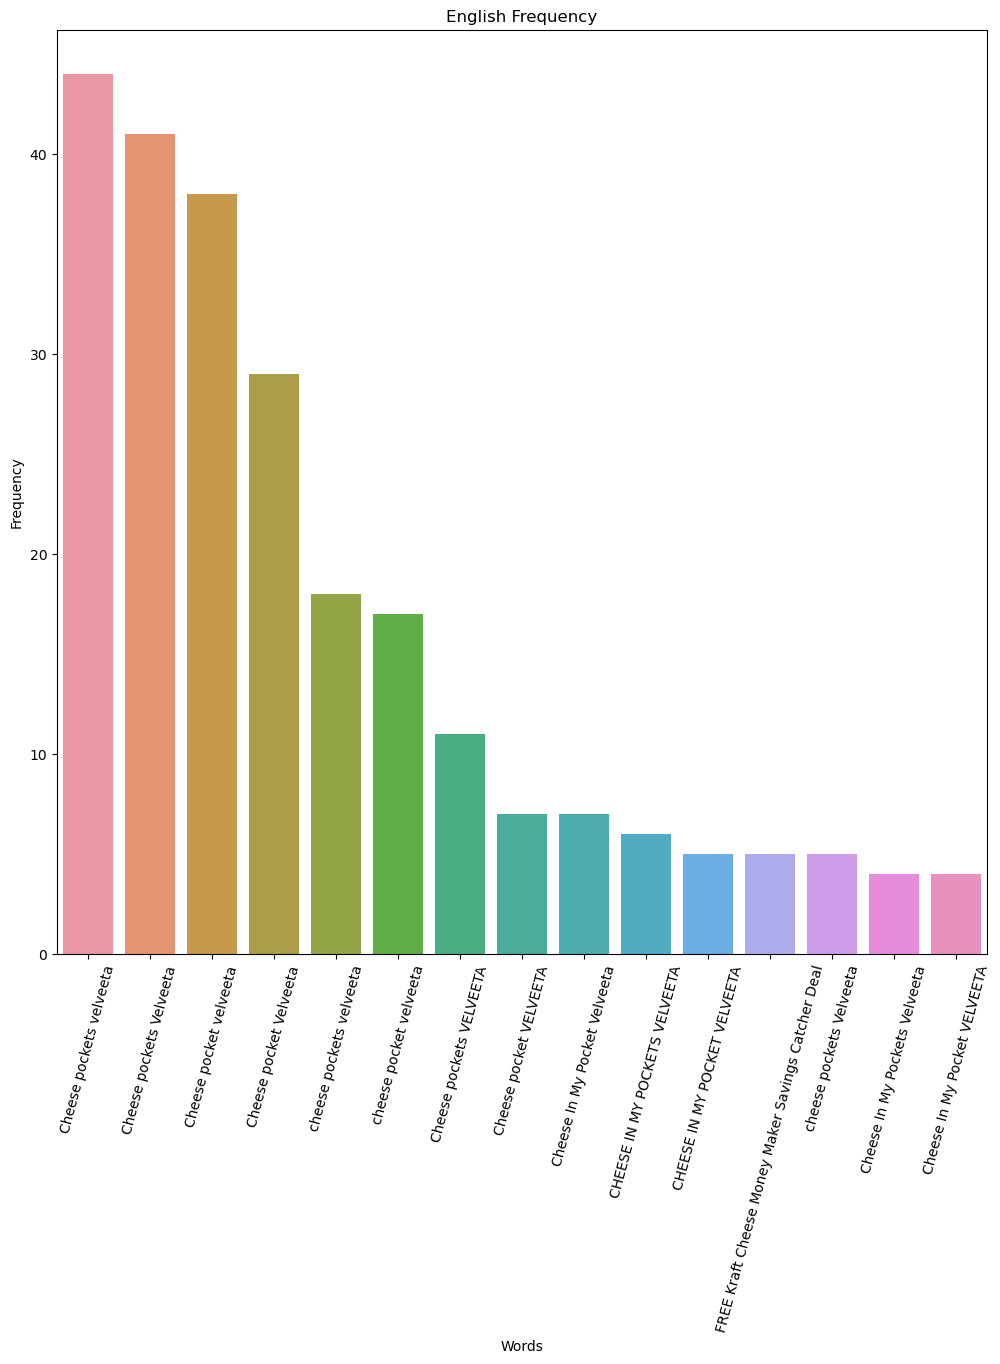

In [18]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(12,12))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=eng_freq.index, y=eng_freq.values, ax=ax).set(title="English Frequency",xlabel="Words"
                                                                       ,ylabel="Frequency")
plt.xticks(rotation=90);


## View the frequency distribution of the words viewing the 20 most common of the Japanese language dataset.

In [19]:
# Frequency of words in the English text
corp2 = data_text_jp
freq_dist_jp = FreqDist(corp2)
print(freq_dist_jp)


<FreqDist with 482 samples and 541 outcomes>


## View the frequency distribution of the words viewing the 20 most common of the Japanese language dataset.

In [20]:
freq_dist_jp_com_20 = freq_dist_jp.most_common(15)
print(type(freq_dist_jp_com_20))
print(freq_dist_jp_com_20)

<class 'list'>
[('', 30), ('velveeta', 7), ('Velveeta', 5), ('rtK ft ss W th RT c https c GvHSp r wlXL X', 4), ('RT shalisemyoung NE INTE', 2), ('NE', 2), ('RT Jabba Jabba Jaw', 2), ('B tomecurran MORE', 2), ('n velveeta', 2), ('Freddo Kraft Cadburys chocs', 2), ('Mannnnnn', 2), ('Doctor J bollox EDU A U BDedU B U', 2), ('bkravitz belichick', 2), ('bkravitz Belichick', 2), ('n CHS BillsRestaurant fail', 2)]


## View as a graph of the frequency distribution of the Japanes words

Create a dict for ease of graphing and then create a series to facilitate the creation of the graph.

In [21]:
jp_freq = pd.Series(dict(freq_dist_jp_com_20))

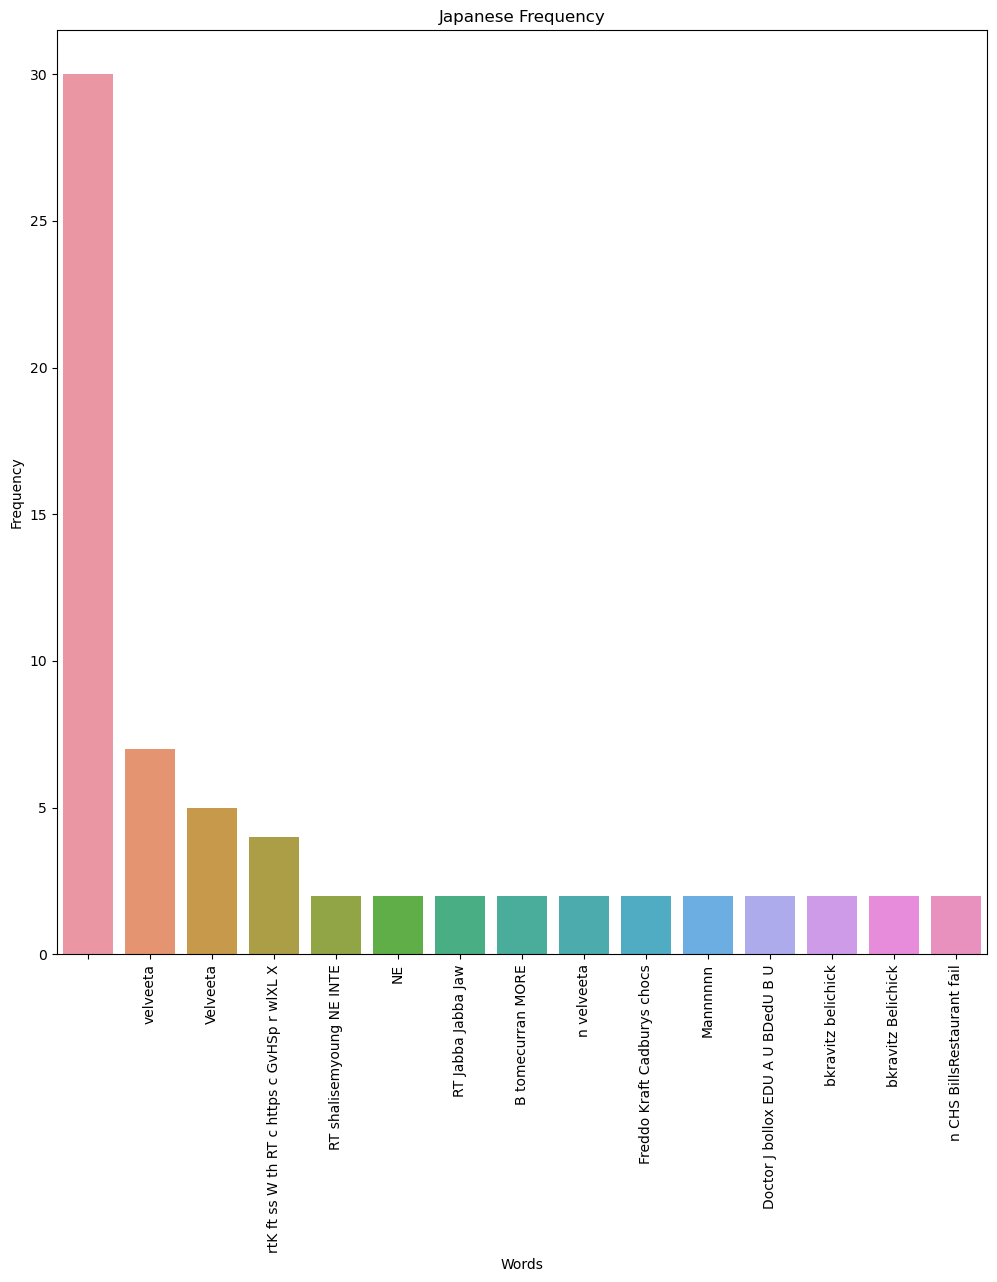

In [22]:
# Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(12,12))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=jp_freq.index, y=jp_freq.values, ax=ax).set(title="Japanese Frequency",xlabel="Words"
                                                                       ,ylabel="Frequency")
plt.xticks(rotation=90);